# Thông tin

1.MSSV: 20520435

2.Họ tên: Nguyễn Duy Đạt

3.Bài tập: 2

4.Ngày thực hiện: 7/4/2022

# Bài tập 2

# 1.Đọc ảnh và hiển thị ảnh kết quả sau khi dò tìm cạnh: Gx, Gy và G. 
# – 2 ảnh: Bicycle.jpg và ( bansoxe.jpg hoặc houseg.bmp)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Baitap2/images'

/content/gdrive/.shortcut-targets-by-id/1dE96Yxb98-JuXTXW4p24eMmyTeXC4Lin/Baitap2/images


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def sobel_filter(img):
  img = cv2.imread(img)
  kernels_x = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]], np.float32)

  kernels_y = np.array([[1,2,1],
                        [0,0,0],
                        [-1,-2,-1]], np.float32)

  kernels_G = np.sqrt(kernels_x**2 + kernels_y**2)
  kernels_theta = np.arctan2(kernels_y, kernels_x)

  # Lọc theo Gx, Gy, G = sqrt(Gx**2 + Gy **2), theta = arctan(Gy/Gx)
  img_rst_x = cv2.filter2D(img,-1,kernels_x)
  img_rst_y = cv2.filter2D(img,-1,kernels_y)
  img_rst_G = cv2.filter2D(img,-1,kernels_G)
  img_rst_theta = cv2.filter2D(img,-1,kernels_theta)

  # Show kết quả
  print("source image")
  cv2_imshow(img)
  print("--------------------------------------")
  print("Filter Gx")
  cv2_imshow(img_rst_x)
  print("--------------------------------------")
  print("Filter Gy")
  cv2_imshow(img_rst_y)
  print("--------------------------------------")
  print("Filter G")
  cv2_imshow(img_rst_G)
  print("--------------------------------------")
  print("Filter Theta")
  cv2_imshow(img_rst_theta)

-Ảnh Bicycle.jpg

source image


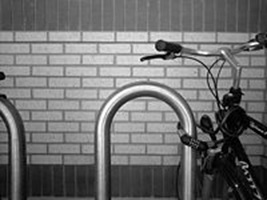

--------------------------------------
Filter Gx


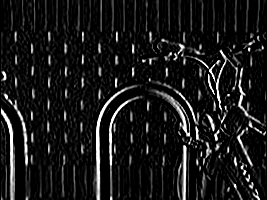

--------------------------------------
Filter Gy


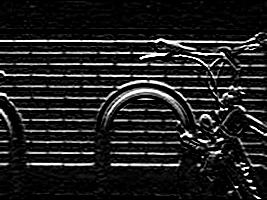

--------------------------------------
Filter G


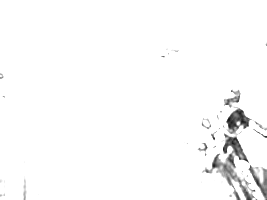

--------------------------------------
Filter Theta


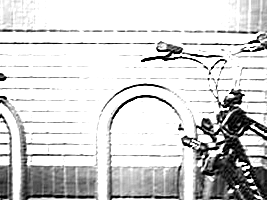

In [ ]:
sobel_filter('Bicycle.jpg')

- Ảnh houseg.bmp

source image


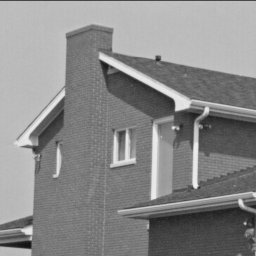

--------------------------------------
Filter Gx


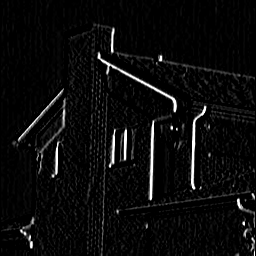

--------------------------------------
Filter Gy


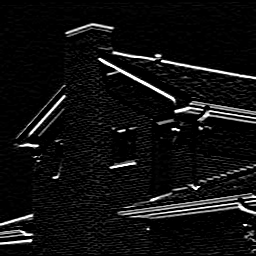

--------------------------------------
Filter G


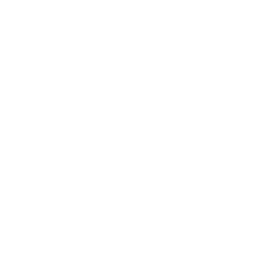

--------------------------------------
Filter Theta


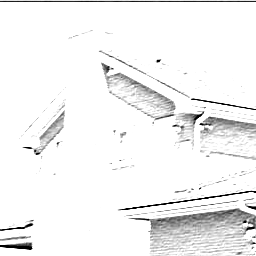

In [ ]:
sobel_filter('houseg.bmp')

# 2.Viết hàm xác định đặc trưng ảnh dựa trên thông tin cạnh: theo trục x và trục y
# Tính khoảng cách euclidean giữa 2 ảnh: sử dụng thư viện của scipy
# Tính sự tương đồng theo cosin giữa 2 ảnh.

# < image_0814.jpg, image_0816.jpg> 
# < image_0814.jpg, image_1248.jpg>

- Xác định đặc trưng ảnh theo x và y

In [ ]:
def sobel_filters(img):
  # img = cv2.imread(img)
  Sx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32)
  Sy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], np.float32)

  Ix = cv2.filter2D(img, -1, Sx)
  Iy = cv2.filter2D(img, -1, Sy)
  
  G= np.hypot(Ix,Iy)
  G= G / G.max()*255
  theta = np.arctan2(Iy,Ix)
  
  return Ix,Iy,G,theta

- Tính khoảng cách Euclidean

In [ ]:
def calFeatureVector(img):
  img = cv2.imread(img, 0)
  img_ = cv2.resize(img, (256, 256))
  _, _, G, _ = sobel_filters(img_)
  row_sum = np.sum(G, axis=1, dtype=np.float64)
  col_sum = np.sum(G, axis=0, dtype=np.float64)
  size = img.shape[0]*img.shape[1]
  return (np.hstack(((row_sum/size).T, col_sum/size)))

In [ ]:
image_0814 = calFeatureVector('image_0814.jpg').flatten()
image_0816 = calFeatureVector('image_0816.jpg').flatten()
image_1248 = calFeatureVector('image_1248.jpg').flatten()

In [ ]:
from scipy.spatial import distance

print('Euclid distance image_0814 and image_0816: ' ,distance.euclidean(image_0814, image_0816))
print('Euclid distance image_0814 and image_1248: ' ,distance.euclidean(image_0814, image_1248))

Euclid distance image_0814 and image_0816:  0.2000265310469642
Euclid distance image_0814 and image_1248:  0.3678091562687716


- Tính cosine similarity

In [ ]:
print('Cosine Similarity image_0814 and image_0816: ',1 - distance.cosine(image_0814, image_0816))
print('Cosine Similarity image_0814 and image_1248: ',1 - distance.cosine(image_0814, image_1248))

Cosine Similarity image_0814 and image_0816:  0.9403013260778474
Cosine Similarity image_0814 and image_1248:  0.8133452847890964
